<a href="https://colab.research.google.com/github/Hanhpt23/Object-Detection-Yolov8/blob/main/PPE-Detection_Yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Yolov8

# In this project, we will learn:
1. Install Yolov8
2. Using a pre-trained model to predict objects in a given image
3. Train Yolov8 on a customized dataset
4. Assessing the results using object detection metrics


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [18]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [1]:
!pip install ultralytics==8.0.20

from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
from PIL import Image

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


Inference pretrained model with Yolov8

In [2]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source= 'https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True


100% 6.23M/6.23M [00:00<00:00, 127MB/s]

2023-09-03 14:17:02.562021: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-03 14:17:03.425960: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 85.2MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 66.6ms
Speed: 0.6ms pre-process, 66.6ms inference, 313.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


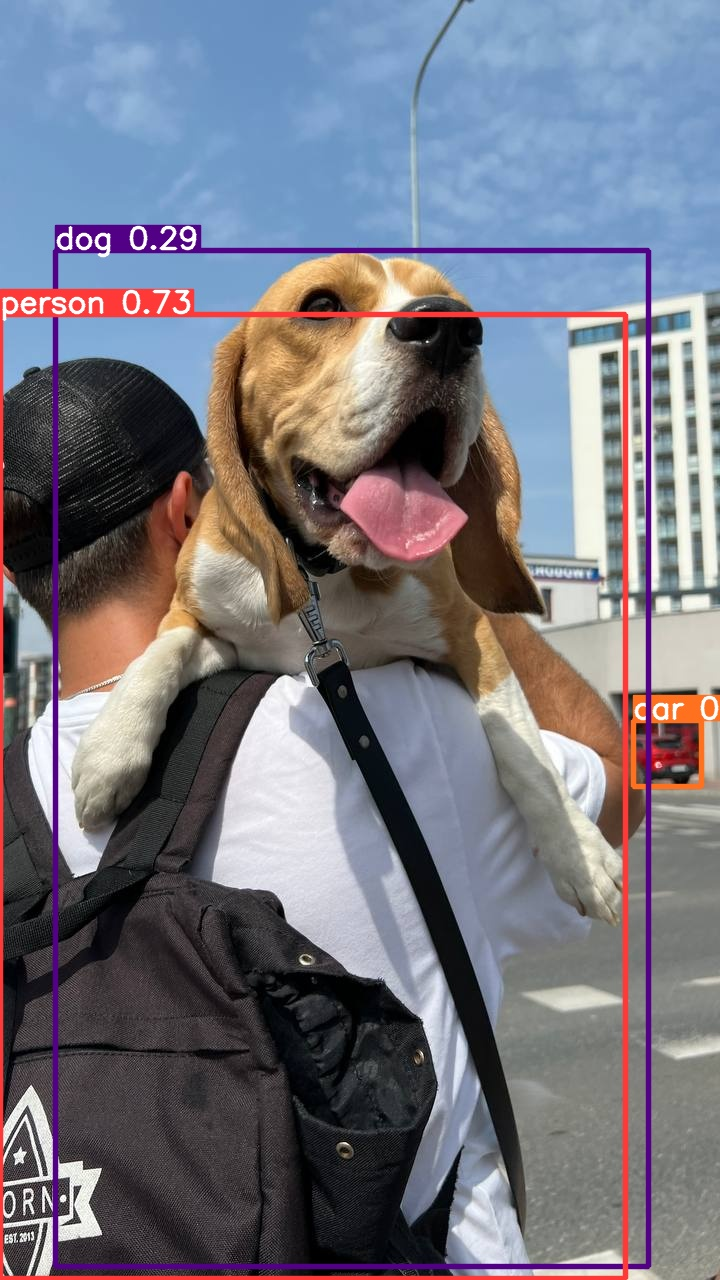

In [3]:
from PIL import Image

image = Image.open('/content/runs/detect/predict/dog.jpeg')
image

In [19]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qNB7sir5QaYerldkASnV")
project = rf.workspace("team31").project("ppe-detection-83wpd")
dataset = project.version(2).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to PPE-detection-2 in yolov8:: 100%|██████████| 1012/1012 [00:00<00:00, 2105.52it/s]


# Install RoboFlow and download dataset
[PPE detection](https://universe.roboflow.com/team31/ppe-detection-83wpd/dataset/6#) dataset

In [20]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data=../content/PPE-detection-2/data.yaml epochs=25 imgsz=640 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=../content/PPE-detection-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False,

# Load saved weight and implement on the validation dataset
Check training weight before loading weight in '/content/runs/detect'.
<br>In my case, I trained up to 12 times, so I load the weight in the folder 'train12'.

In [21]:
!ls {HOME}/runs/detect/train12/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch345.jpg
events.out.tfevents.1693751308.c02f72be2f42.6037.0  train_batch346.jpg
F1_curve.png					    train_batch347.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


## Load results
1. Confusion matrix
2. Metrics (loss, precision, recall)

/content


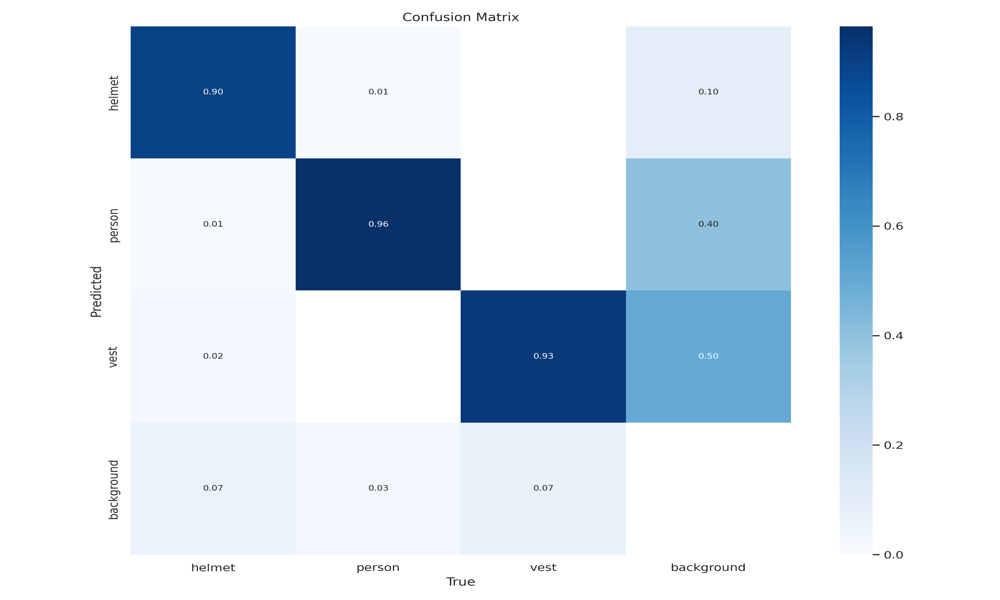

In [30]:
%cd {HOME}

image = Image.open(f'{HOME}/runs/detect/train12/confusion_matrix.png').resize((1000, 600))
image

/content


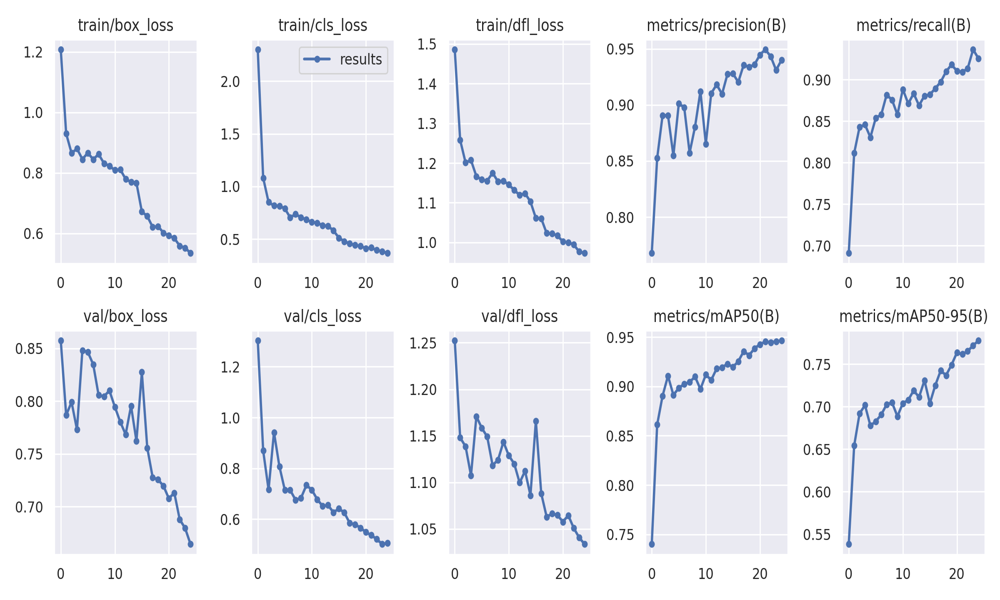

In [29]:
%cd {HOME}
image = Image.open(f'{HOME}/runs/detect/train12/results.png').resize((1000, 600))
image

/content


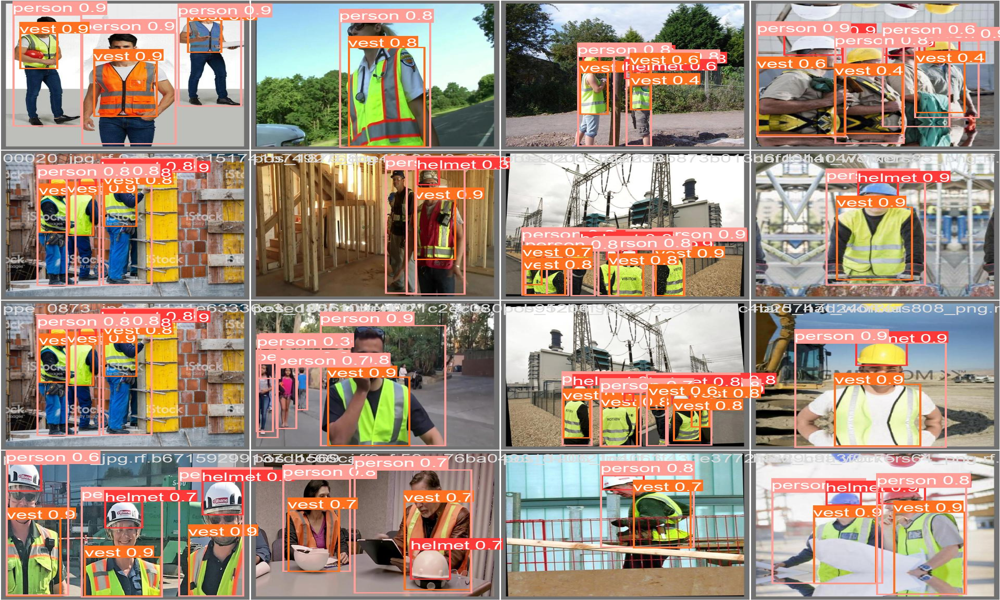

In [31]:
%cd {HOME}
image = Image.open(f'{HOME}/runs/detect/train12/val_batch0_pred.jpg').resize((1000, 600))
image

# Validate model

In [32]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train12/weights/best.pt data={dataset.location}/data.yaml

/content
2023-09-03 14:47:25.668206: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-03 14:47:26.576530: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/PPE-detection-2/valid/labels.cache... 92 images, 1 backgrounds, 0 corrupt: 100% 92/92 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:07<00:00,  1.19s/it]
                   all         92        394       0.94      0.925      0.947      0.778
                helmet         

## Inference with Custom Model

In [33]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train12/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-09-03 14:50:04.127473: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-03 14:50:05.394469: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/53 /content/datasets/PPE-detection-2/test/images/20_jpg.rf.be39911eec64ec89d8b05be48cfeb8df.jpg: 640x640 1 helmet, 1 person, 1 vest, 16.2ms
image 2/53 /content/datasets/PPE-detection-2/test/images/41_jpg.rf.49de2c12112847817dbfe14192961b35.jpg: 640x640 3 helmets, 3 persons, 3 vests, 16.3ms
image 3/53 /content/datasets/PPE-detection-2/test/images/49_jpg.rf.3f04f0a9b6563

## Load predicted images

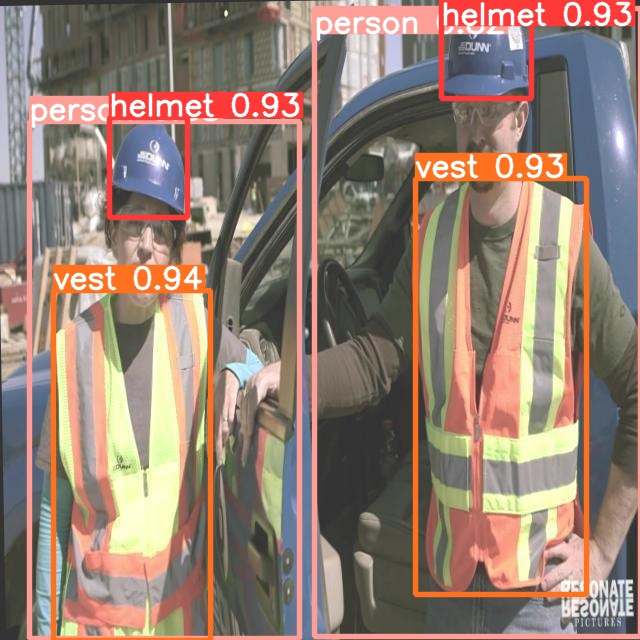

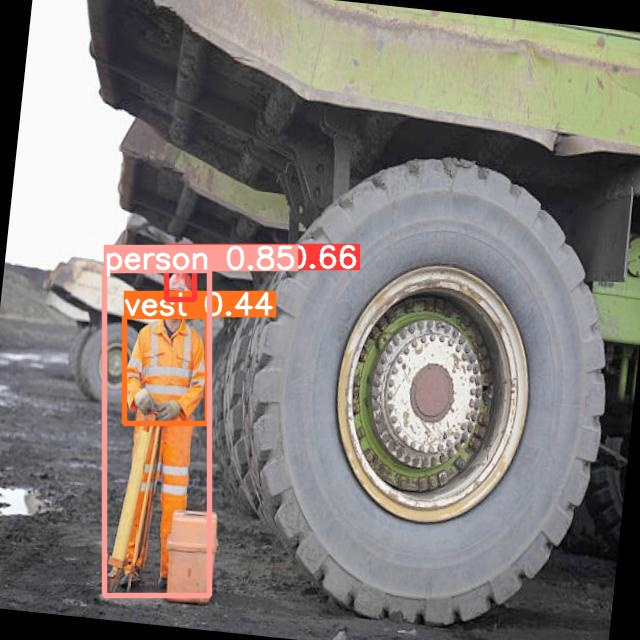

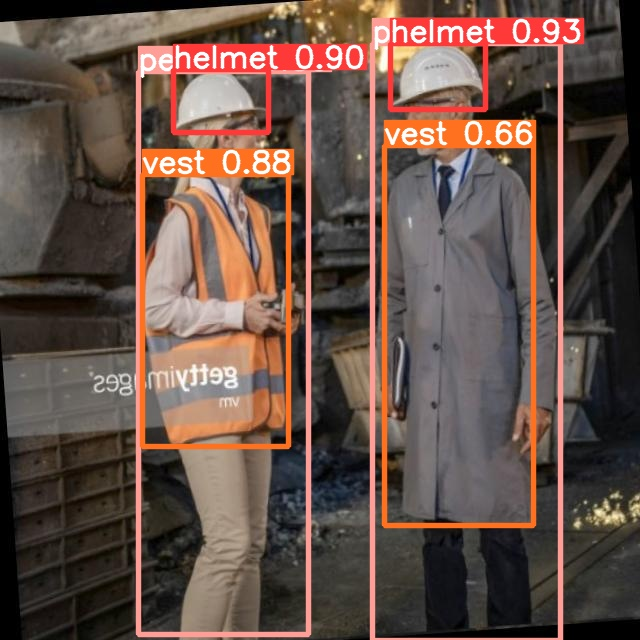

In [37]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path,  width=800))
      print("\n")